In [1]:
from tensorflow.keras.layers import Input,Conv2D,Concatenate,Add,SeparableConv2D,ReLU,TimeDistributed
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense,BatchNormalization,Dropout,AveragePooling2D,Activation,GlobalAveragePooling2D
from tensorflow.keras import Model
import tensorflow as tf
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#!unzip '/content/drive/MyDrive/Rice.zip' -d '/content/drive/MyDrive/Rice'

In [4]:
!ls '/content/drive/MyDrive/Rice/Rice/train'

'Brown Rust'   Healthy	'Yellow Rust'


In [5]:
!ls '/content/drive/MyDrive/Rice/Rice/val'

'Brown Rust'   Healthy	'Yellow Rust'


In [6]:
dataset_path_train = os.listdir('/content/drive/MyDrive/Rice/Rice/train')

In [7]:
dataset_path_validation = os.listdir('/content/drive/MyDrive/Rice/Rice/val')

In [8]:
disease_items_train=[]

for item in dataset_path_train:
  all_disease = os.listdir('/content/drive/MyDrive/Rice/Rice/train' +'/'+item)
  for disease in all_disease:
    disease_items_train.append((item , str('/content/drive/MyDrive/Rice/Rice/train'+'/'+item ) +'/'+disease ))

In [9]:
train_disease_df = pd.DataFrame(data=disease_items_train,columns = ['Train_Disease_Type' ,'Train_Disease_Image'])
train_disease_df.head()

,Train_Disease_Type,Train_Disease_Image
0,Brown Rust,/content/drive/MyDrive/Rice/Rice/train/Brown R...
1,Brown Rust,/content/drive/MyDrive/Rice/Rice/train/Brown R...
2,Brown Rust,/content/drive/MyDrive/Rice/Rice/train/Brown R...
3,Brown Rust,/content/drive/MyDrive/Rice/Rice/train/Brown R...
4,Brown Rust,/content/drive/MyDrive/Rice/Rice/train/Brown R...


In [10]:
disease_items_test=[]

for item in dataset_path_validation:
  all_disease = os.listdir('/content/drive/MyDrive/Rice/Rice/val' +'/'+item)
  for disease in all_disease:
    disease_items_test.append((item , str('/content/drive/MyDrive/Rice/Rice/val'+'/'+item ) +'/'+disease ))

In [11]:
test_disease_df = pd.DataFrame(data=disease_items_test,columns = ['Test_Disease_Type' ,'Test_Disease_Image'])
test_disease_df.head()

,Test_Disease_Type,Test_Disease_Image
0,Brown Rust,/content/drive/MyDrive/Rice/Rice/val/Brown Rus...
1,Brown Rust,/content/drive/MyDrive/Rice/Rice/val/Brown Rus...
2,Brown Rust,/content/drive/MyDrive/Rice/Rice/val/Brown Rus...
3,Brown Rust,/content/drive/MyDrive/Rice/Rice/val/Brown Rus...
4,Brown Rust,/content/drive/MyDrive/Rice/Rice/val/Brown Rus...


In [12]:
img_width = 224
img_height = 224
train_images = []
train_labels = []
path ='/content/drive/MyDrive/Rice/Rice/train/'
for i in dataset_path_train:
  data_path = path+str(i)
  file_names = [i for i in os.listdir(data_path)]
  #print(file_names)
  for f in file_names:
    img = cv2.imread(data_path+'/'+f)
    img = cv2.resize(img,(img_width,img_height))
    train_images.append(img)
    train_labels.append(i)

In [13]:
train_labels = np.array(train_labels)
print(train_labels)

['Brown Rust' 'Brown Rust' 'Brown Rust' ... 'Healthy' 'Healthy' 'Healthy']


In [14]:
img_width = 224
img_height = 224
test_images = []
test_labels = []

path = '/content/drive/MyDrive/Rice/Rice/val/'
for i in dataset_path_validation:
  data_path = path+str(i)
  file_names = [i for i in os.listdir(data_path)]
  #print(file_names)
  for f in file_names:
    img = cv2.imread(data_path+'/'+f)
    img = cv2.resize(img,(img_width,img_height))
    test_images.append(img)
    test_labels.append(i)

In [15]:
test_labels = np.array(test_labels)
print(test_labels)

['Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust' 'Brown Rust'
 'Brown Ru

In [16]:
x_train = np.array(train_images)
x_train = x_train.astype('float32')/255.0

In [17]:
x_test = np.array(test_images)
x_test = x_test.astype('float32')/255.0

In [18]:
from sklearn.preprocessing import LabelEncoder
y_train = train_disease_df['Train_Disease_Type'].values
y_test = test_disease_df['Test_Disease_Type'].values

In [19]:
le =  LabelEncoder()
y_train = le.fit_transform(y_train)       
y_test = le.fit_transform(y_test)        

In [20]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (2942, 224, 224, 3)
y_train: (2942,)
x_test: (737, 224, 224, 3)
y_test: (737,)


# ***VGG19 Architecture ***

In [21]:
image_height = 224
image_width = 224
image_channels = 3
image_dimension = (image_height,image_width,image_channels)   #shape (height, width, channels)
input_image = Input(shape = image_dimension) 
    
#1st convolutional block
x = Conv2D (filters = 64 , kernel_size = 3, activation = 'relu' , padding = 'same' , name='block1_conv1')(input_image)
x = BatchNormalization()(x)
x = Conv2D (filters = 64,  kernel_size = 3, activation = 'relu' , padding = 'same' , name='block1_conv2') (x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = MaxPool2D (pool_size= 2, strides = 2,padding ='same',name='block1_maxpool') (x)

#2nd convulotional block
x = Conv2D(filters = 128 , kernel_size = 3 , activation = 'relu' , padding = 'same', name = 'block2_conv1')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 128 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block2_conv2') (x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = MaxPool2D(pool_size=2 , strides = 2, padding = 'same',name='block2_maxpool')(x)

#3rd convulotional block
x = Conv2D(filters = 256 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name = 'block3_conv1') (x)
x = BatchNormalization()(x)
x = Conv2D(filters = 256 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block3_conv2')  (x)
x = BatchNormalization()(x)
x = Conv2D(filters = 256 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block3_conv3')(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 256 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block3_conv4')(x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = MaxPool2D(pool_size=2 , strides = 2, padding = 'same',name='block3_maxpool')(x)

#4th convulotional block
x = Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name = 'block4_conv1') (x)
x = BatchNormalization()(x)
x = Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block4_conv2')  (x)
x = BatchNormalization()(x)
x = Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block4_conv3') (x)
x = BatchNormalization()(x)
x = Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block4_conv4') (x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = MaxPool2D(pool_size=2 , strides = 2, padding = 'same',name='block4_maxpool')(x)


#5th convulotional block
x = Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name = 'block5_conv1') (x)
x = BatchNormalization()(x)
x = Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block5_conv2')  (x)
x = BatchNormalization()(x)
x = Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block5_conv3') (x)
x = BatchNormalization()(x)
x = Conv2D(filters = 512 , kernel_size = 3 , activation = 'relu' , padding = 'same' , name='block5_conv4') (x)
x = BatchNormalization()(x)
x = Dropout(0.1)(x)
x = MaxPool2D(pool_size=2 , strides = 2, padding = 'same',name='block5_maxpool')(x)

#Flattening the features
x = Flatten(name='flatten')(x)

#Dense Layers
x = Dense(units = 4096,activation = 'relu',name='fully_connected_layer1')(x)
x = Dense(units = 4096,activation = 'relu',name='fully_connected_layer2')(x)
output = Dense(units = 4,activation = 'softmax',name='prediction')(x) #here, units = 7

In [22]:
model_VGG19 = Model (inputs = input_image , outputs = output , name = 'VGG19')

In [23]:
model_VGG19.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics =['accuracy']) 
#sparse_categorical_crossentropy (scce) produces a category index of the most likely matching category.

In [24]:
model_VGG19.summary()

Model: "VGG19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0     

In [25]:
history = model_VGG19.fit(x_train,y_train,epochs = 5,validation_data = (x_test, y_test),shuffle=True,batch_size= 15)

Epoch 1/5
197/197 [==============================] - 114s 453ms/step - loss: 10.2940 - accuracy: 0.5687 - val_loss: 1533.6813 - val_accuracy: 0.3786
Epoch 2/5
197/197 [==============================] - 87s 444ms/step - loss: 1.5803 - accuracy: 0.7590 - val_loss: 3.3629 - val_accuracy: 0.3297
Epoch 3/5
197/197 [==============================] - 87s 444ms/step - loss: 0.6774 - accuracy: 0.8287 - val_loss: 1.6847 - val_accuracy: 0.5346
Epoch 4/5
197/197 [==============================] - 86s 439ms/step - loss: 0.4178 - accuracy: 0.8651 - val_loss: 1.4121 - val_accuracy: 0.5400
Epoch 5/5
197/197 [==============================] - 86s 439ms/step - loss: 0.5134 - accuracy: 0.8559 - val_loss: 0.5712 - val_accuracy: 0.8236


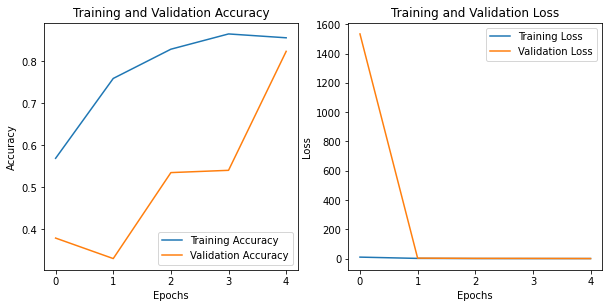

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [27]:
#On testing data
predictions = model_VGG19.predict(x_test)
predictions

24/24 [==============================] - 7s 180ms/step


array([[9.9994469e-01, 1.3644803e-08, 5.5342545e-05, 2.0072962e-34],
       [9.9982613e-01, 9.7105999e-07, 1.7293460e-04, 5.2221995e-28],
       [9.4664514e-01, 3.6811802e-08, 5.3354830e-02, 1.3065524e-24],
       ...,
       [3.2199008e-05, 6.6653968e-07, 9.9996710e-01, 1.4830551e-25],
       [1.2077363e-03, 4.8412207e-05, 9.9874383e-01, 5.5625663e-21],
       [2.7133718e-01, 2.6560940e-02, 7.0210189e-01, 8.1691969e-09]],
      dtype=float32)

In [28]:
#By adding the axis argument, numpy looks at the rows and columns individually.
#axis=1 means that the operation is performed across the rows of log_preds.
y_pred = np.argmax(predictions,axis=1) #from log probabilities to 0 or 1
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,

In [29]:
predicted_labels = le.inverse_transform(y_pred)
predicted_labels

array(['Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown Rust',
       'Brown Rust', 'Brown Rust', 'Brown Rust', 'Brown

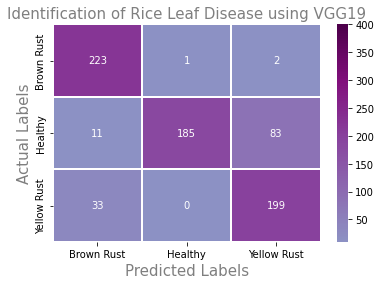

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,predicted_labels)
vmin = 10
vmax = 400
center = 0
xticklabels= ['Brown Rust' ,'Healthy','Yellow Rust']
yticklabels= ['Brown Rust' ,'Healthy','Yellow Rust']
sns.heatmap(cm, annot=True,linewidth=.8,cmap="BuPu",vmin=vmin,vmax=vmax,center=center,xticklabels=xticklabels,yticklabels=yticklabels, fmt='.0f')
font1 = {'size': 15,'alpha':0.5}
font2 = {'size':15,'alpha':0.5}
plt.title("Identification of Rice Leaf Disease using VGG19",fontdict = font1)
plt.xlabel("Predicted Labels",fontdict = font2)
plt.ylabel("Actual Labels",fontdict = font2)
plt.show()

In [34]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test,y_pred))
print ("Precision = ", metrics.precision_score(y_test,y_pred,average='weighted', labels=np.unique(y_pred)))
print ("Recall = ", metrics.recall_score(y_test,y_pred,average='weighted', labels=np.unique(y_pred)))
print ("F1 Score = ", metrics.f1_score(y_test,y_pred,average='weighted', labels=np.unique(y_pred)))

Accuracy =  0.8236092265943012
Precision =  0.8532156507310804
Recall =  0.8236092265943012
F1 Score =  0.8214383955072935
